In [3]:
import matplotlib.pyplot as plt
from pgm import crop_pgm_image
import numpy as np

In [4]:
file_path = 'gray8bit_Dataset\\'
file_list = ['nightshot_iso_100.pgm',
             'leaves_iso_1600.pgm', 
             'leaves_iso_200.pgm',
             'zone_plate.pgm']

In [5]:
img_dict = {}
for file_name in file_list:
    with open(file_path + file_name, 'rb') as pgmf:
        im = plt.imread(pgmf)
        img_dict[file_name] = crop_pgm_image(im)

In [6]:
img_dict.keys()

dict_keys(['nightshot_iso_100.pgm', 'leaves_iso_1600.pgm', 'leaves_iso_200.pgm', 'zone_plate.pgm'])

### SVD

In [7]:
from numpy.linalg import svd

In [8]:
def compress_svd(img, k=0):
    U, s, V = svd(img, full_matrices=False)
    reconst_matrix = np.dot(U[:,:k], np.dot(np.diag(s[:k]), V[:k,:]))
    return reconst_matrix, s

def loss(original, reconst):
    n, m = original.shape
    return np.sum((reconst - original)**2) / (n * m)

def compress_show_images(img_name: str):
    img = img_dict[img_name]
    original_shape = img.shape
    U, s, V = svd(img, full_matrices=False)
    exp_k = np.arange(5, int(len(s)/2), 5)
    compress_ratio = []
    loss_list = []
    for k in exp_k:
        reconst_img, s = compress_svd(img, k)
        compress_ratio.append(k*(original_shape[0]+original_shape[1]+1)/(original_shape[0]*original_shape[1]))
        loss_list.append(loss(img, reconst_img))
    return compress_ratio, loss_list                    
                     
        
        

In [9]:
img_name = file_list[0]
compress_ratio, loss_list = compress_show_images(img_name)

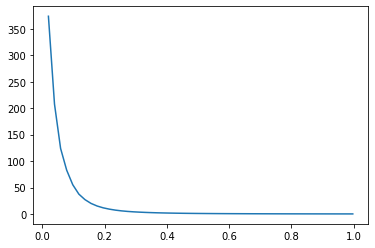

In [10]:
plt.plot(compress_ratio, loss_list)